# Trabajo Práctico Nº 2 - Intro IA

Integrantes:
- Sarina, Diego 
- Nº SIU: a1519
- Correo: sarinadiego@gmail.com

## California Housing

Este es un popular [dataset](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset) que vamos a estar leyendo desde **Scikit-Learn**.

Se requiere construir una regresión que nos permita predecir el valor de valor medio de casas en distritos de California (medidos en ciento de miles de dólares $100.000). Este dataset deriva del censo de 1990 de EEUU, donde cada observación es un bloque. Un bloque es la unidad geográfica más pequeña para la cual la Oficina del Censo de EE. UU. publica datos de muestra (un bloque típicamente tiene una población de 600 a 3,000 personas).

Un hogar es un grupo de personas que residen dentro de una casa. Dado que el número promedio de habitaciones y dormitorios en este conjunto de datos se proporciona por hogar, estas columnas pueden tomar valores grandes para grupos de bloques con pocos hogares y muchas casas vacías.

Los atributos en el orden que se guardaron en el dataset son:

- `MedInc`: Ingreso medio en el bloque
- `HouseAge`: Edad mediana de las casas en el bloque
- `AveRooms`: Número promedio de habitaciones por hogar.
- `AveBedrms`: Número promedio de dormitorios por hogar.
- `Population`: Población del bloque
- `AveOccup`: Número promedio de miembros por hogar.
- `Latitude`: Latitud del bloque
- `Longitude`: Longitud del bloque

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, explained_variance_score
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression, Ridge

sns.set_theme()

In [2]:
# Leemos el dataset
california_housing = fetch_california_housing()

# Y obtenemos los atributos y target
X = california_housing.data
y = california_housing.target

# Transformamos en Pandas
X = pd.DataFrame(X, columns=california_housing['feature_names'])
y = pd.Series(y, name=california_housing['target_names'][0])

# Unimos a X e y, esto ayuda a la parte de la gráfica del mapa de calor de correlación
dataset = pd.concat([X, y], axis=1)

## Punto Nº 1

Obtener la correlación entre los atributos y los atributos con el target. 
- ¿Cuál atributo tiene mayor correlación lineal con el target y cuáles atributos parecen estar más correlacionados entre sí?

Para lograr visualizar esto, obtendremos los valores de las correlaciones y además lo graficaremos en un mapa de calor.

In [3]:
# Visualizo la informacion del dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


>Resumido rápidamente de la ejecución de la celda anterior donde vimos la información del dataset. Podemos ver que todos nuestros atributos son de tipo numérico (float) y a ninguno le faltan valores en el conjunto de datos.

In [4]:
# Con el DataFrame de pandas creado anteriormente, calculo la correlacion como:

correlacion = dataset.corr()

print("Los valores de correlacion son: ")
correlacion

Los valores de correlacion son: 


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


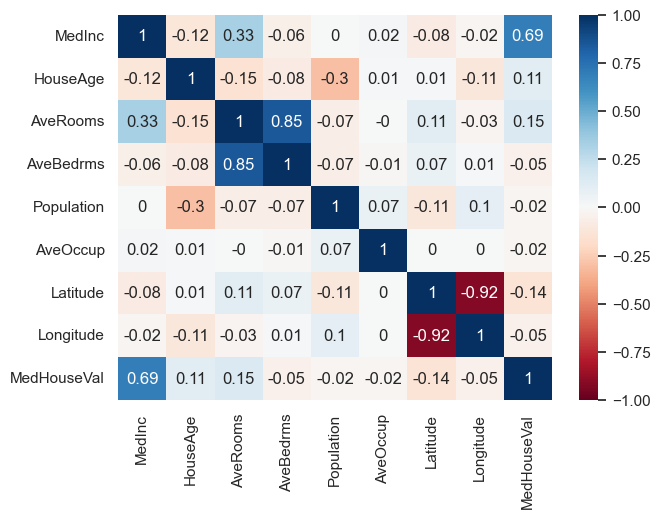

In [5]:
# Para una visualización mas clara, representemos los mismos en un mapa de calor y produciendo un redondeo de los decimales a 2 digitos.

correlacion = dataset.corr().round(2)

# Podemos ver cuál es la relación entre variables, recordemos, es mejor con la variable objetivo, pero malo si es entre variables de entrada....
plt.figure(figsize=(7, 5))
sns.heatmap(data=correlacion,cmap="RdBu", vmin=-1, annot=True, annot_kws={"size": 12})
plt.show()

### Teoría punto Nº 1
De acuerdo a lo que podemos ver en el mapa de calor:

- El atributo que tiene mayor correlación lineal con el target es el atributo: `MedInc` con un valor de 0.688075 (0.69). Esto sugiere que hay una relación significativa entre el ingreso medio en el bloque y el costo mediano de las casas en el mismo

Luego los atributos que parecen estar más correlacionados entre sí son:

- `AveBedrms` (número promedio de dormitorios por hogar) con `AveRooms` (número promedio de habitaciones por hogar) con una correlación de 0.847621. Esto es esperado dado que a medida que aumenta el número promedio de habitaciones por hogar, esperaríamos que aumente también el número promedio de dormitorios.
- `MedInc` con `AveRooms`, si bien podemos ver que estamos hablando de una correlación de 0.33 vs 0.84 como fue el ítem anterior, decidí involucrarla como uno de los ítems que tiene "mayor" correlación dado que luego los niveles caen a correlaciones por debajo del 0.15.


Text(0.5, 1.0, 'Correlación MedInc vs MedHouseVal')

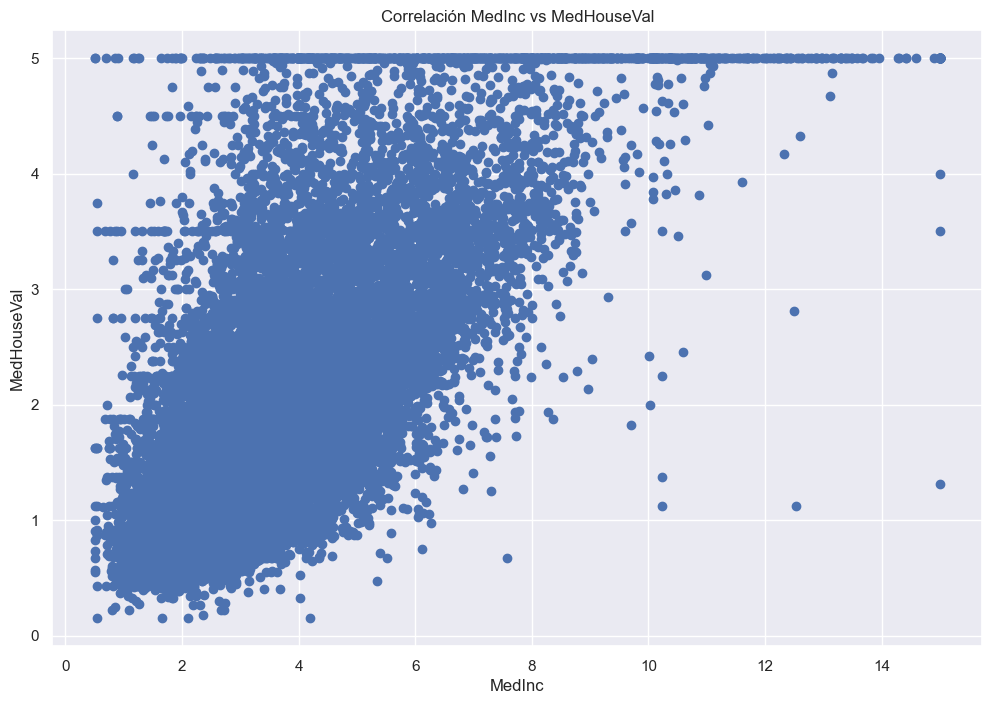

In [6]:
# Además, dado que vimos que tenemos una correlación fuerte entre MedInc y MedHouseVal voy a graficar dicha correlacion

plt.figure(figsize=(12, 8)) 
plt.scatter(data = dataset, x = "MedInc", y = "MedHouseVal") 
plt.xlabel("MedInc") 
plt.ylabel("MedHouseVal")
plt.title("Correlación MedInc vs MedHouseVal")

Como habíamos mencionado anteriormente, existe una correlación positiva y lo vemos en el patrón general que a medida que aumenta el "Ingreso medio en el bloque" (MedInc), aumenta la Mediana del costo de casas en el bloque (MedHouseVal).

## Punto Nº 2

Graficar los histogramas de los diferentes atributos y el target. 

- ¿Qué tipo de forma de histograma se observa? 
- ¿Se observa alguna forma de campana que nos indique que los datos pueden provenir de una distribución gaussiana, sin entrar en pruebas de hipótesis?

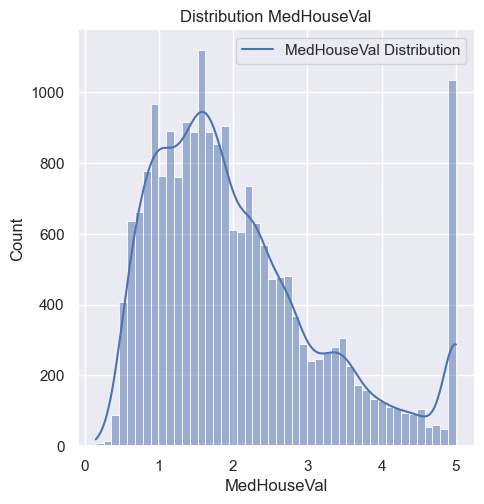

In [7]:
# Grafico de distribucion para el TARGET 
sns.displot(dataset['MedHouseVal'], kde = True) 
plt.title('Distribution MedHouseVal') 
plt.xlabel("MedHouseVal") 
plt.legend(['MedHouseVal Distribution'], loc = 'best') 
plt.show()

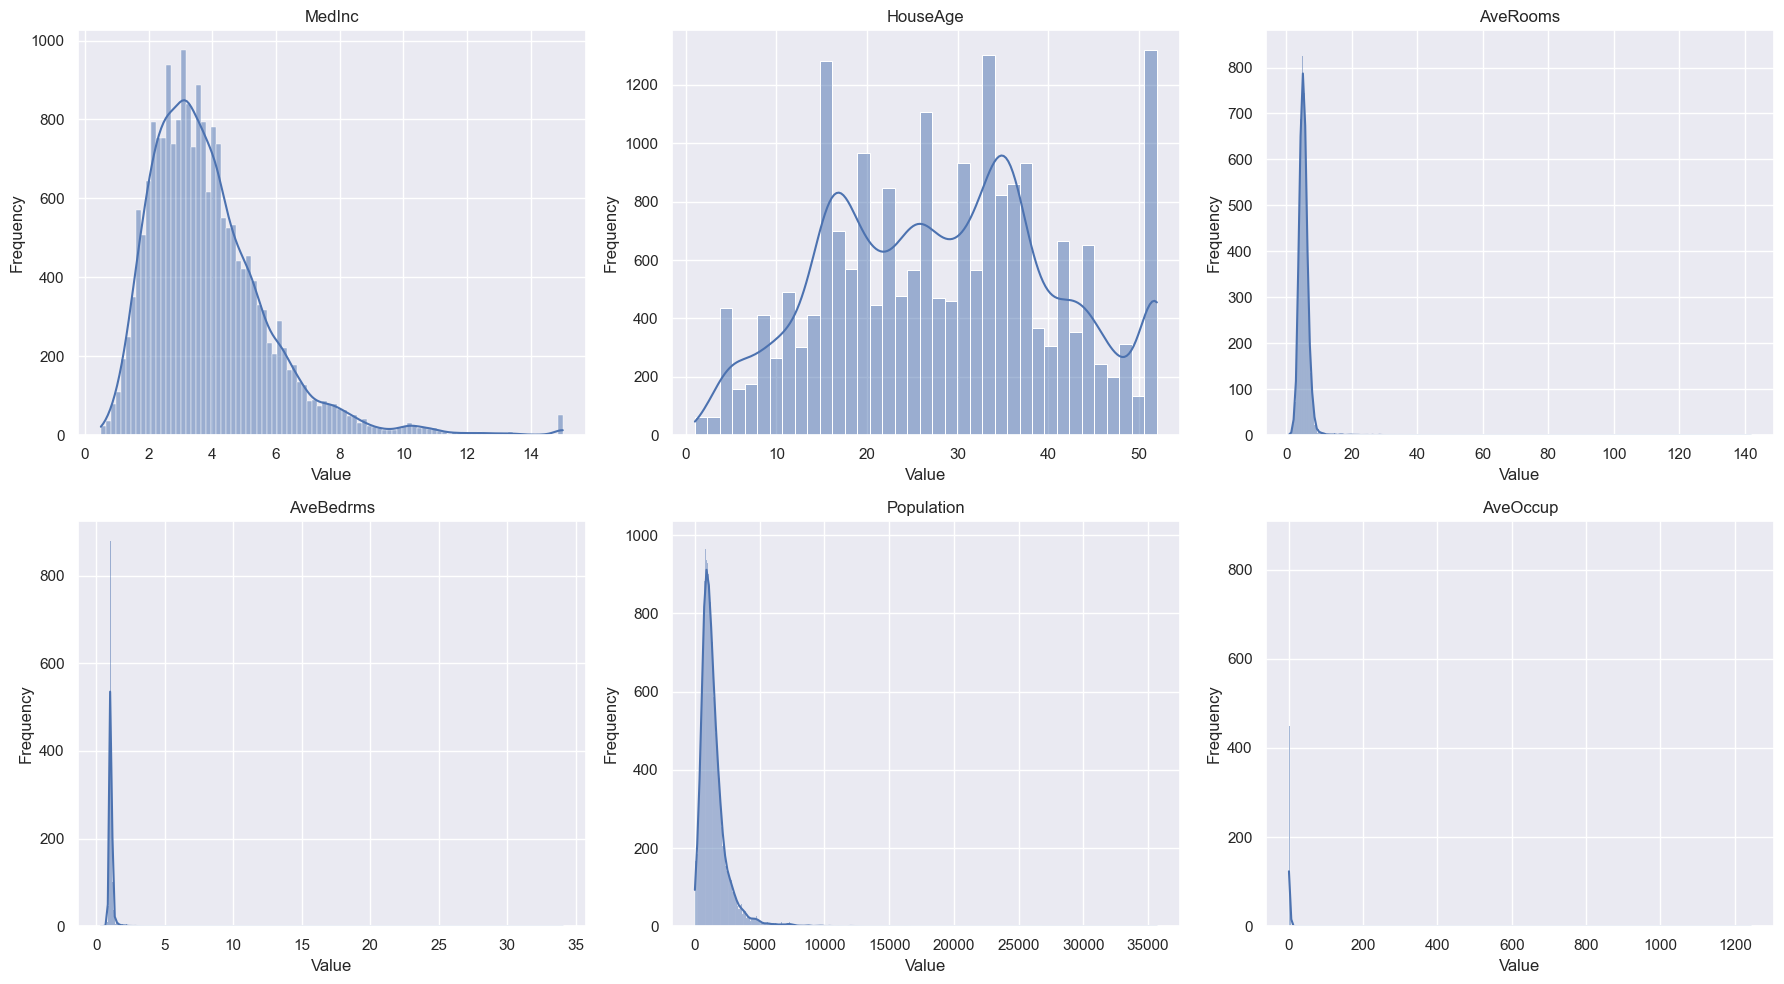

In [8]:
# Grafico los histogramas para los atributos, sin Lat y Long
atributos_dataset = ["MedInc", "HouseAge", "AveRooms", "AveBedrms", "Population", "AveOccup"]


fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
for i, feature in enumerate(atributos_dataset):
    row = i // 3
    col = i % 3
    sns.histplot(dataset[feature], kde=True, ax=axs[row, col])
    axs[row, col].set_title(feature)
    axs[row, col].set_xlabel('Value')
    axs[row, col].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


### Teoría punto Nº 2

A partir de las gráficas de los histogramas de los atributos y el target, podemos a priori:

- Visualizar sobre el target y el atributo `MedInc` una especie de campana gaussiana.
- Sin embargo los mismos (a excepción de HouseAge) parecen estar sesgada a izq. (valores más cercanos al "eje y"). Esto es de la simple observación, sin entrar en más detalles.

Además, con base en los histogramas anteriores también podemos observar que los atributos están distribuidos en escalas muy diferentes y también lo están los valores de estos que podría implicar tener que pre-procesar estos valores para un mejor resultado.

Finalmente a simple vista, creo que al utilizar un modelo de regresión lineal, dado que los datos están sesgados debería esperar tener un rendimiento más bajo, ya que podría concentrarse en los valores atípicos el modelo.

## Punto Nº 3

Calcular la regresión lineal usando todos los atributos. Con el set de entrenamiento, calcular la varianza total del modelo y la que es explicada con el modelo. 

- ¿El modelo está capturando el comportamiento del target? Expanda su respuesta.

**Se separa el dataset en entrenamiento y evaluación:**

*estamos dividiendo aleatoriamente los datos en conjuntos de train y test usando el método `train_test_split()`. El 70% se reserva para train y el 30% para test.*

>NOTA: ya habíamos validado que no había valores nulos y que además los datos eran de tipo numéricos 


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,  y, test_size=0.3, random_state=42)

# Dimensiones
print("Dimension de X_train:",X_train.shape)
print("Valores de y_train:",y_train.size)
print("Dimension de X_test:",X_test.shape)
print("Valores de y_test:",y_test.size)

Dimension de X_train: (14448, 8)
Valores de y_train: 14448
Dimension de X_test: (6192, 8)
Valores de y_test: 6192


In [10]:
# Escalemos los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lo transformemos en DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=california_housing['feature_names'])
X_test_scaled = pd.DataFrame(X_test_scaled, columns=california_housing['feature_names'])

In [11]:
# Visulizo los datos escalados vs los originales
print("Datos originales:")
X_train.head()

Datos originales:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
7061,4.1312,35.0,5.882353,0.975490,1218.0,2.985294,33.93,-118.02
14689,2.8631,20.0,4.401210,1.076613,999.0,2.014113,32.79,-117.09
17323,4.2026,24.0,5.617544,0.989474,731.0,2.564912,34.59,-120.14
10056,3.1094,14.0,5.869565,1.094203,302.0,2.188406,39.26,-121.00
15750,3.3068,52.0,4.801205,1.066265,1526.0,2.298193,37.77,-122.45


In [12]:
print("Datos escalados:")
X_train_scaled.head()

Datos escalados:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.133506,0.509357,0.181060,-0.273850,-0.184117,-0.010825,-0.805682,0.780934
1,-0.532218,-0.679873,-0.422630,-0.047868,-0.376191,-0.089316,-1.339473,1.245270
2,0.170990,-0.362745,0.073128,-0.242600,-0.611240,-0.044800,-0.496645,-0.277552
3,-0.402916,-1.155565,0.175848,-0.008560,-0.987495,-0.075230,1.690024,-0.706938
4,-0.299285,1.857152,-0.259598,-0.070993,0.086015,-0.066357,0.992350,-1.430902


In [13]:
# Entrenamiento
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train_scaled, y_train) # Entreno con los datos de entrenamiento escalados

LinearRegression()

In [14]:
# Hago la prediccion con el dataset de TRAIN escalado tambien
y_pred_lineal = linear_regression_model.predict(X_train_scaled)


In [15]:
# Calculo las varianzas solicitadas

# varianza total del modelo (real)
model_total_variance = np.var(y_train)

# varianza explicada por el modelo
model_explained_variance = np.var(y_pred_lineal)

# Calculo el R2 que es la relacion entre la varizan del modelo y la varianza total.
r2_linear = r2_score(y_train, y_pred_lineal)

# calculo para verificar: R2 = S_model / S_Total  => S_model = R^2 * S_Total
# s_model = r2_linear * model_total_variance # solo curiosidad personal

print("Varianza total del modelo (real):", model_total_variance)
print("Varianza explicada por el modelo:", model_explained_variance)
print("Coeficiente de Pearson (R^2):", r2_linear)
#print("Varianza explicada por el modelo:", s_model)


Varianza total del modelo (real): 1.3396959774719193
Varianza explicada por el modelo: 0.8163383486451452
Coeficiente de Pearson (R^2): 0.6093459727972159


### Teoría punto Nº 3

Al calcular la regresión lineal utilizando todos los atributos del conjunto de datos de entrenamiento, obtuvimos los siguientes resultados:

- Varianza total del modelo: 1.3396959774719193
- Varianza explicada por el modelo: 0.8163383486451452
- Coeficiente de Pearson: 0.6093459727972159

Para evaluar si el modelo está capturando adecuadamente el comportamiento del target, voy a hacer uso principal del coeficiente de Pearson R^2:

1. Coeficiente de Pearson: 
    Dado que estamos en un modelo de regresión lineal, esta métrica vale ser considerada. Aclarado lo anterior, sabemos que este coeficiente es una relación entre la varianza del modelo y la varianza total, y el mismo ha dado un valor de alrededor 0.609, por ende esto significa que explica alrededor del 61% de la variabilidad del target. Un R^2 de este tamaño indica que el modelo tiene cierta capacidad predictiva, pero no explica toda la variabilidad en el target. Un valor de R^2 más cercano a 1 indicaría una mejor capacidad predictiva.


Por lo tanto podemos decir que el modelo actual tiene cierta capacidad predictiva y explica una parte significativa de la variabilidad en el target está capturando parcialmente el comportamiento del target, no captura toda la variabilidad. Es decir, que aunque la varianza explicada es alta (60%) todavía hay una gran parte que no está siendo explicada por nuestros atributos. Esto nos puede hacer sospechar de que haya otros factores no considerados en el modelo que influyen sobre el Target.


## Punto Nº 4

Calcular las métricas de MSE, MAE y $R^2$ del set de evaluación.

In [16]:
# Obtenemos las predicciones del modelo con el set de evaluacion
y_pred_test = linear_regression_model.predict(X_test_scaled)

# Calculo las metricas de evaluacion solicitadas:

r2_linear_regression_model = r2_score(y_test, y_pred_test)
mae_linear_regression_model = mean_absolute_error(y_test, y_pred_test)
mse_linear_regression_model = mean_squared_error(y_test, y_pred_test)

print("Calculo de metricas de evalución: ")
print("Coeficiente de Pearson R-cuadrado:", r2_linear_regression_model)
print("Error absoluto medio:", mae_linear_regression_model)
print("Error cuadratico medio:", mse_linear_regression_model)

Calculo de metricas de evalución: 
Coeficiente de Pearson R-cuadrado: 0.5957702326061662
Error absoluto medio: 0.5272474538305952
Error cuadratico medio: 0.5305677824766754


## Punto Nº 5

Crear una regresión de Ridge. Usando una validación cruzada de 5-folds y usando como métrica el MSE, calcular el 
mejor valor de $\alpha$, buscando entre [0, 12.5]. Graficar el valor de MSE versus $\alpha$

In [17]:
# Genero varios valores de alpha
alpha_values = np.linspace(0, 12.5, 100)

In [18]:
# Voy a crear un ciclo e iterar para obtener todos los valores utilizando la implementacion de scikit-learn de validacion cruzada
mse_values = []
for alpha in alpha_values:
    # Creo el modelo
    ridge_model = Ridge(alpha=alpha) 
    
    # Implementacion de scikit-learn
    cv_scores = cross_val_score(ridge_model, X_train_scaled, y=y_train, scoring="neg_mean_squared_error", cv=5, n_jobs=-1)
    
    # cv_scores contiene el valor de MSE para cada uno de los folds. Calculo la media a continuación 
    mse_values.append(-np.mean(cv_scores))

In [19]:
# Obtengo el mejor valor de alpha - calculo valores auxiliares para graficar
best_alpha_index = np.argmin(mse_values)
best_alpha = alpha_values[best_alpha_index]
best_mse = mse_values[best_alpha_index]

print("El mejor valor de alpha es:", best_alpha) #Alpha de = 6.565656565656566
# Podemos obtener el valor medio y desvio estandar de cada caso:
print(f"La media del MSE en 5-fold CV para la regresión Ridge con alpha={best_alpha} es {best_mse}")



El mejor valor de alpha es: 6.565656565656566
La media del MSE en 5-fold CV para la regresión Ridge con alpha=6.565656565656566 es 0.5268175765319489


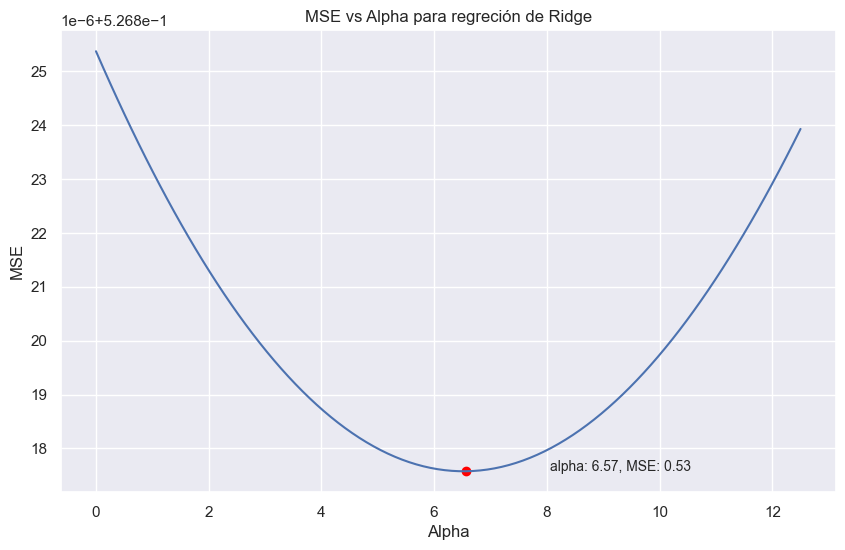

In [20]:
# Grafico el MSE versus alpha
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, mse_values)
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('MSE vs Alpha para regreción de Ridge')
plt.grid(True)

plt.text(best_alpha + 4 , best_mse, f'alpha: {best_alpha:.2f}, MSE: {best_mse:.2f}', fontsize=10, ha='right')
plt.scatter(best_alpha, best_mse, color='red', label=f'Mejor alpha: {best_alpha:.2f}, MSE: {best_mse:.2f}')

plt.show()

## Punto Nº 6

Comparar, entre la regresión lineal y la mejor regresión de Ridge, los resultados obtenidos en el set de evaluación. 

- ¿Cuál da mejores resultados (usando MSE y MAE)? Conjeturar por qué el mejor modelo mejora. 
- ¿Qué error puede haberse reducido?

In [21]:
# Del item Nº 4 teniamos calculados el MSE, MAE y R^2 con el set de evaluación de la regresion lineal

print("Metricas de evaluación de la regresión lineal previamente calculados: ")
print("Coeficiente de Pearson R-cuadrado:", r2_linear_regression_model)
print("Error absoluto medio:", mae_linear_regression_model)
print("Error cuadratico medio:", mse_linear_regression_model)

Metricas de evaluación de la regresión lineal previamente calculados: 
Coeficiente de Pearson R-cuadrado: 0.5957702326061662
Error absoluto medio: 0.5272474538305952
Error cuadratico medio: 0.5305677824766754


In [22]:
# Calculo las metricas de evaluación para la regresión de Ridge con valor de alpha = 6.565 (best_alpha)

ridge_best_alpha_model = Ridge(alpha=best_alpha)

# Entreno el modelo:
ridge_best_alpha_model.fit(X_train_scaled, y_train)

# Realizo la predicción con el set de evaluación
y_pred_ridge = ridge_best_alpha_model.predict(X_test_scaled)

# Calculo las metricas de evaluación
r2_ridge_best_alpha_model = r2_score(y_test, y_pred_ridge)
mse_ridge_best_alpha_model = mean_squared_error(y_test, y_pred_ridge)
mae_ridge_best_alpha_model = mean_absolute_error(y_test, y_pred_ridge)

print("\nRidge")
print("Coeficiente de Pearson R-cuadrado:", r2_ridge_best_alpha_model)
print("Error absoluto medio:", mae_ridge_best_alpha_model)
print("Error cuadratico medio:", mse_ridge_best_alpha_model)


Ridge
Coeficiente de Pearson R-cuadrado: 0.595886694230855
Error absoluto medio: 0.5272217082364
Error cuadratico medio: 0.5304149219232502


In [23]:
# Evaluacion de modelos

r2_diff = r2_ridge_best_alpha_model - r2_linear_regression_model
mse_diff = mse_ridge_best_alpha_model - mse_linear_regression_model
mae_diff = mae_ridge_best_alpha_model - mae_linear_regression_model

print(f"R2 diferencia: {r2_diff}")
print(f"MSE diferencia: {mse_diff}")
print(f"MAE diferencia: {mae_diff}")

R2 diferencia: 0.00011646162468881283
MSE diferencia: -0.00015286055342511595
MAE diferencia: -2.5745594195214494e-05


### Teoría punto Nº 6:

Respondiendo a las preguntas de este apartado, comenzamos por: 

1. ¿Cuál da mejores resultados (usando MSE y MAE)? Conjeturar por qué el mejor modelo mejora.
    
    Observamos que tanto el MSE como el MAE son menores en el mejor modelo de Ridge en comparación con la regresión lineal. Esto indica que el modelo de Ridge tiene un mejor rendimiento en términos de precisión de predicción. La diferencia en el MSE y MAE sugiere que las predicciones del modelo de Ridge están más cerca de los valores reales del target en comparación con la regresión lineal.
    
    En cuanto a porque el modelo puede ser mejor, sabemos que el modelo de regresión lineal simple puede sufrir de sobreajuste si el número de características es alto en comparación con el tamaño del conjunto de datos. Por otra parte, Ridge al agregar términos de regularización a la función de pérdida, puede mitigar el efecto del sobreajuste al penalizar los coeficientes grandes. Esto puede conducir a modelos más estables y generalizables, lo que resulta en una mejor capacidad predictiva.

2. ¿Qué error puede haberse reducido?

    En el contexto de la regresión, el objetivo es reducir la variabilidad total en el target (S_T) al explicar parte de esta variabilidad mediante la regresión (S_R). Por lo tanto, el error que se podría haber reducido al utilizar un modelo de regresión de Ridge es el error residual (S_E).

    El error residual (S_E) representa las discrepancias entre los valores reales del target y las predicciones del modelo, es decir, la variabilidad no explicada por el modelo. Al reducir el error residual, el modelo de regresión mejora en su capacidad para predecir con precisión los valores del target.

    En el contexto del problema presentado, al comparar la regresión lineal simple con el modelo de Ridge, la mejora en el rendimiento del modelo de Ridge puede atribuirse a una reducción del error residual. El modelo de Ridge, al regularizar los coeficientes y reducir el sobreajuste, puede capturar mejor la estructura en los datos, lo que conduce a una reducción en las discrepancias entre las predicciones del modelo y los valores reales del target. En consecuencia, el error residual (S_E) se reduce, lo que se refleja en una mejora en las métricas de evaluación, como el MSE y el MAE.